<a href="https://colab.research.google.com/github/kushiraj18/DATA-ANALYSIS-USING-PYTHON/blob/main/LAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/DailyDelhiClimateTest.csv")

In [ ]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-17-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print("\nDataset Statistics:\n", data.describe())


Dataset Statistics:
          meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [1]:
import kagglehub
import pandas as pd
import os
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")
file_path = os.path.join(path, 'DailyDelhiClimateTrain.csv')
a = pd.read_csv(file_path)
print(a)

100%|██████████| 22.0k/22.0k [00:00<00:00, 12.1MB/s]

Extracting files...
            date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [2]:
# Check the structure of the dataset
print("Dataset structure:")
print(a.info())

# Display basic statistics for numerical columns
print("\nBasic statistics of the dataset:")
print(a.describe())

# Re-describe the dataset after handling missing values
print("\nUpdated statistics of the dataset:")
print(a.describe())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Basic statistics of the dataset:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      3

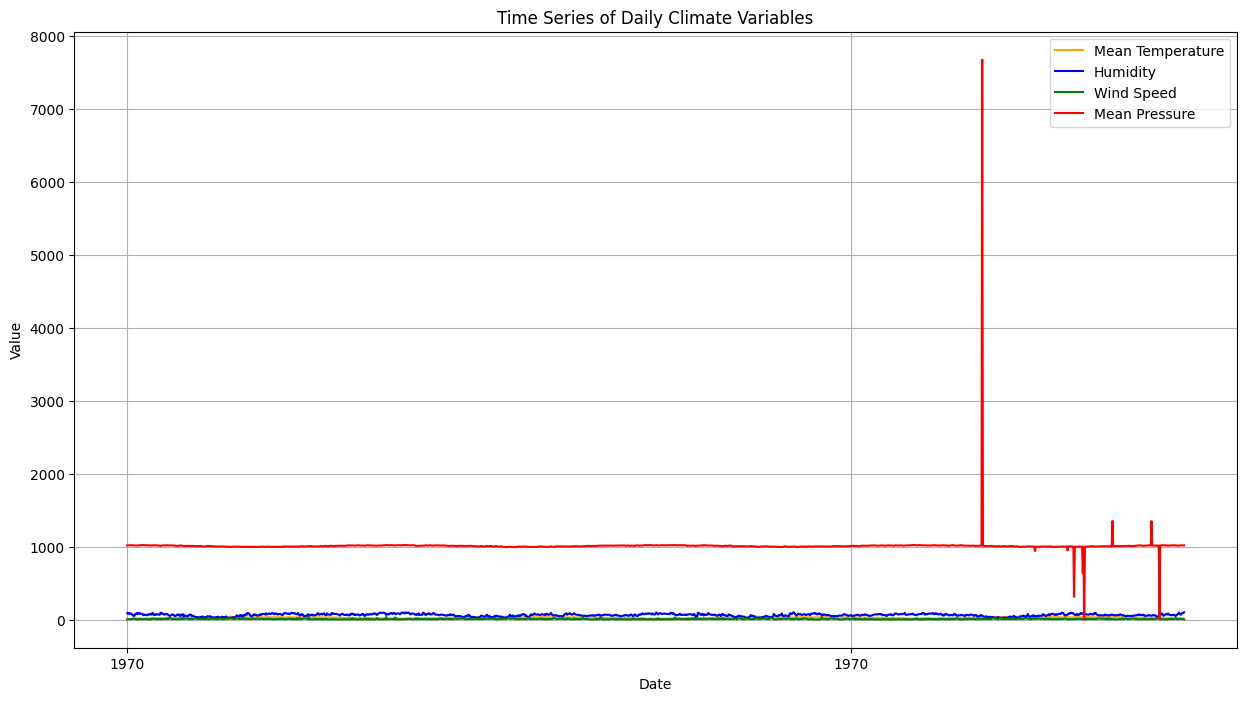

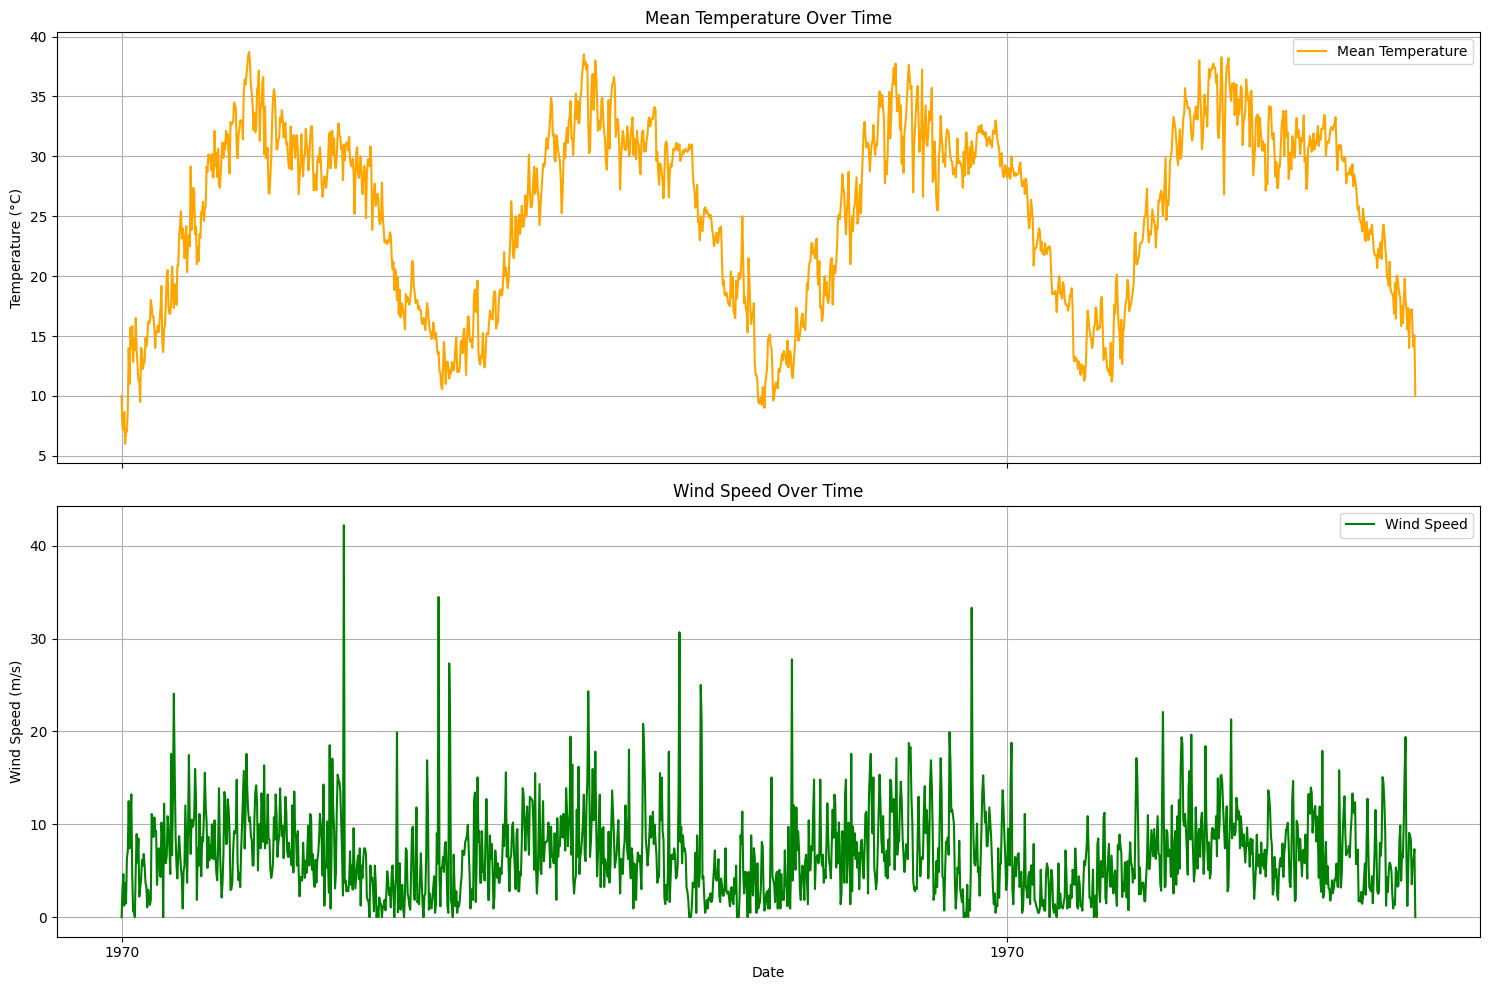

In [3]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is parsed as a datetime index (if not already done)
a.index = pd.to_datetime(a.index)

# Plot time series for all variables
plt.figure(figsize=(15, 8))
plt.plot(a.index, a['meantemp'], label='Mean Temperature', color='orange')
plt.plot(a.index, a['humidity'], label='Humidity', color='blue')
plt.plot(a.index, a['wind_speed'], label='Wind Speed', color='green')
plt.plot(a.index, a['meanpressure'], label='Mean Pressure', color='red')
plt.title("Time Series of Daily Climate Variables")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Subplots to visualize the relationship between temperature and wind speed over time
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Mean temperature over time
axs[0].plot(a.index, a['meantemp'], label='Mean Temperature', color='orange')
axs[0].set_title("Mean Temperature Over Time")
axs[0].set_ylabel("Temperature (°C)")
axs[0].legend()
axs[0].grid()

# Wind speed over time
axs[1].plot(a.index, a['wind_speed'], label='Wind Speed', color='green')
axs[1].set_title("Wind Speed Over Time")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Wind Speed (m/s)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


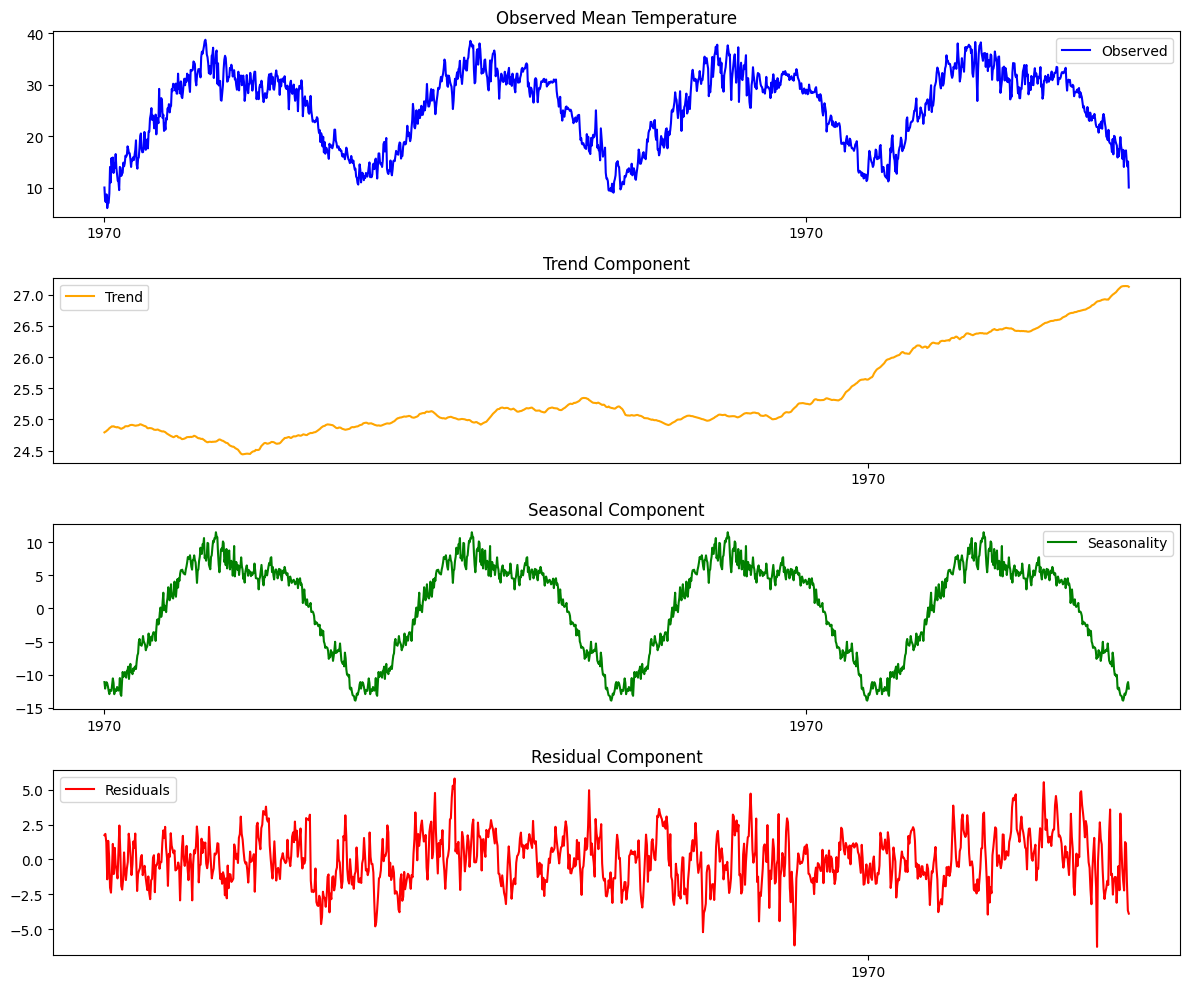

Seasonal Component Summary:
count    1462.000000
mean       -0.015875
std         7.116575
min       -13.909063
25%        -6.300945
50%         2.862091
75%         5.776824
max        11.478642
Name: seasonal, dtype: float64


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition on the daily mean temperature
decomposition = seasonal_decompose(a['meantemp'], model='additive', period=365)

# Plot the decomposition results
plt.figure(figsize=(12, 10))

# Observed component
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title("Observed Mean Temperature")
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title("Trend Component")
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title("Seasonal Component")
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title("Residual Component")
plt.legend()

plt.tight_layout()
plt.show()

# Analyze seasonal patterns
seasonal_pattern = decomposition.seasonal
print("Seasonal Component Summary:")
print(seasonal_pattern.describe())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecast Evaluation Metrics:
Mean Absolute Error (MAE): 7.39
Root Mean Squared Error (RMSE): 8.23


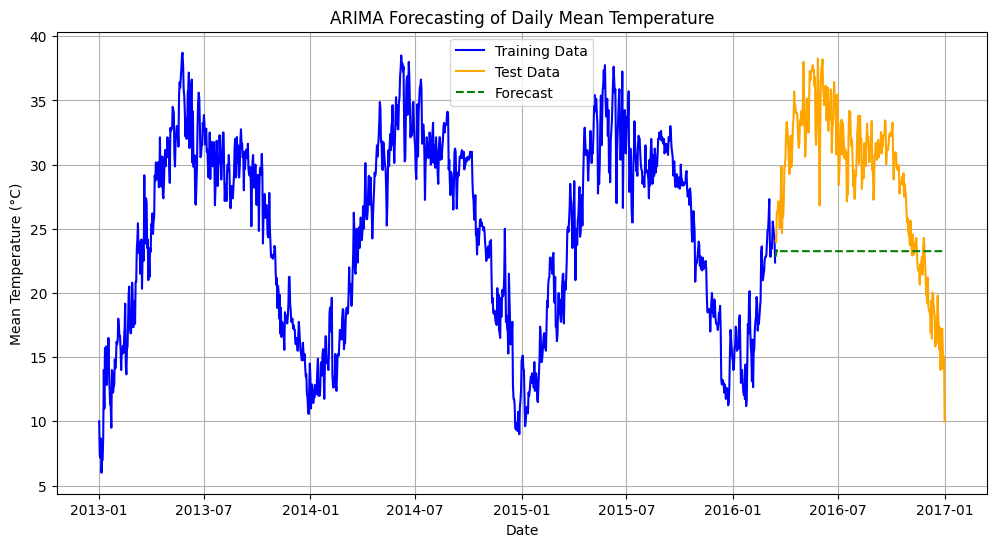

In [5]:
!pip install statsmodels
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the dataset into training and testing sets (80% training, 20% testing)
train_size = int(len(a) * 0.8)
train, test = a['meantemp'][:train_size], a['meantemp'][train_size:]

# Convert the training and testing data to pandas Series with a frequency
train = pd.Series(train.values, index=pd.to_datetime(a['date'][:train_size]), name='meantemp')
test = pd.Series(test.values, index=pd.to_datetime(a['date'][train_size:]), name='meantemp')


# Fit ARIMA model to the training data
# (p, d, q) are the model orders - you might need to tune these
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the test set
forecast = model_fit.predict(start=test.index[0], end=test.index[-1])

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print metrics
print("Forecast Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Test Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green", linestyle="--")
plt.title("ARIMA Forecasting of Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid()
plt.show()